# Breadth First Search

In [10]:
queue = []
visited = []

graph = {
    '5': ['2', '6'],
    '2': ['3', '9'],
    '6': ['1'],
    '3': [],
    '9': ['1'],
    '1': []
}

def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)

    while queue:
        m = queue.pop(0)
        print(m)

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)


print("Following is the breadth-first search")
bfs(visited, graph, '5')



Following is the breadth-first search
5
2
6
3
9
1


# Depth First Search

In [3]:
graph = {
    '5': ['2', '6'],
    '2': ['3', '9'],
    '6': ['1'],
    '3': [],
    '9': ['1'],
    '1': []
}
visited = set()


def dfs(visited, graph, node):
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)


print("Following is the Depth-First Search")
dfs(visited, graph, '5')

Following is the Depth-First Search
5
2
3
9
1
6


# Decision Tree

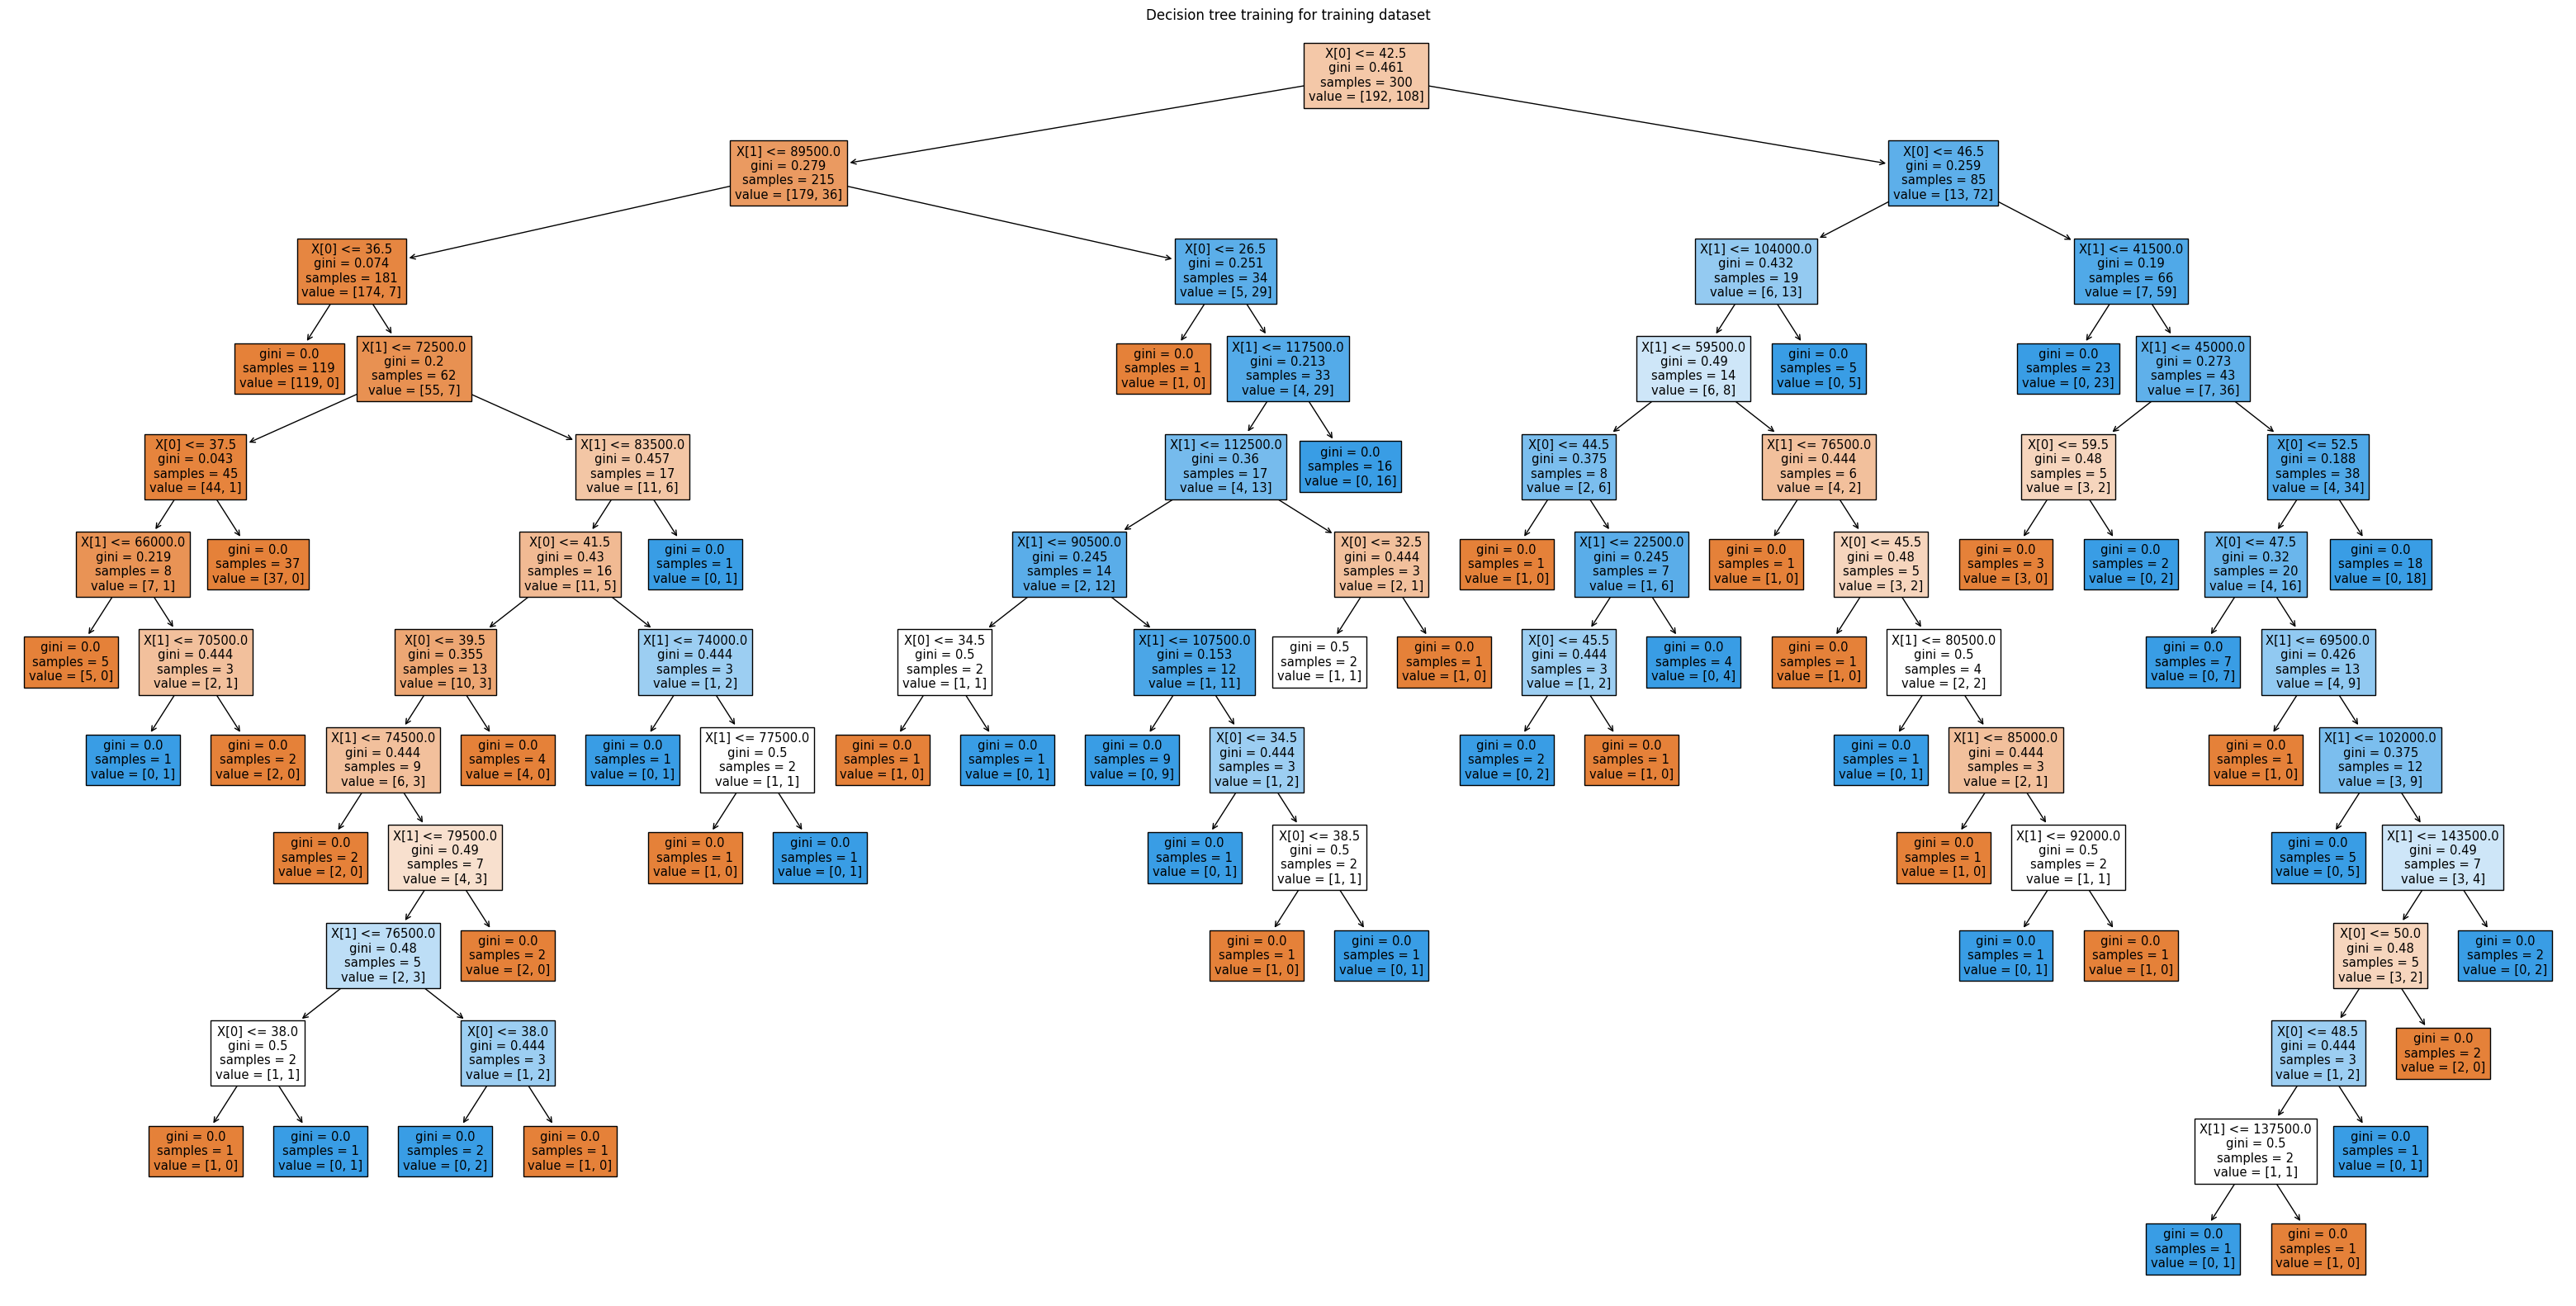

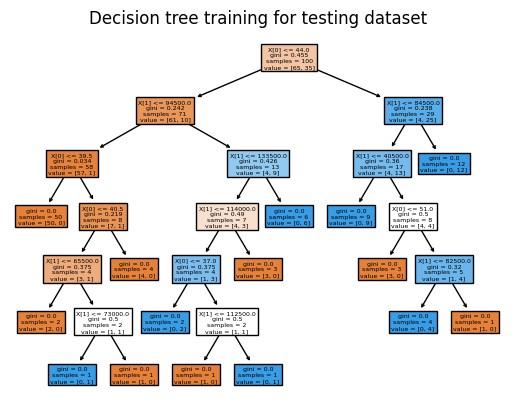

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\aoons\Downloads\decisiontree_Data.csv")
#df.info()

# splitting the dataset into input and output datasets
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101)
classifer = DecisionTreeClassifier( random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)
y_pred = classifer.predict(X_test)
accuracy_score(y_pred,y_test)
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

# Bi directional Search

In [3]:
class adjacent_Node:

    def __init__(self, v):
        self.vertex = v
        self.next = None


class bidirectional_Search:

    def __init__(self, vertices):

        self.vertices = vertices
        self.graph = [None] * self.vertices

        self.source_queue = list()
        self.last_node_queue = list()

        self.source_visited = [False] * self.vertices
        self.last_node_visited = [False] * self.vertices

        self.source_parent = [None] * self.vertices
        self.last_node_parent = [None] * self.vertices

    def AddEdge(self, source, last_node):

        node = adjacent_Node(last_node)
        node.next = self.graph[source]
        self.graph[source] = node

        node = adjacent_Node(source)
        node.next = self.graph[last_node]
        self.graph[last_node] = node

    def breadth_fs(self, direction='forward'):

        if direction == 'forward':

            current = self.source_queue.pop(0)
            connected_node = self.graph[current]

            while connected_node:
                vertex = connected_node.vertex

                if not self.source_visited[vertex]:
                    self.source_queue.append(vertex)
                    self.source_visited[vertex] = True
                    self.source_parent[vertex] = current

                connected_node = connected_node.next
        else:

            current = self.last_node_queue.pop(0)
            connected_node = self.graph[current]

            while connected_node:
                vertex = connected_node.vertex

                if not self.last_node_visited[vertex]:
                    self.last_node_queue.append(vertex)
                    self.last_node_visited[vertex] = True
                    self.last_node_parent[vertex] = current

                connected_node = connected_node.next

    def is_intersecting(self):

        #
        for i in range(self.vertices):
            if (self.source_visited[i] and
                    self.last_node_visited[i]):
                return i

        return -1

    def path_st(self, intersecting_node,
                source, last_node):

        path = list()
        path.append(intersecting_node)
        i = intersecting_node

        while i != source:
            path.append(self.source_parent[i])
            i = self.source_parent[i]

        path = path[::-1]
        i = intersecting_node

        while i != last_node:
            path.append(self.last_node_parent[i])
            i = self.last_node_parent[i]

        path = list(map(str, path))

        print(' '.join(path))

    def bidirectional_search(self, source, last_node):

        self.source_queue.append(source)
        self.source_visited[source] = True
        self.source_parent[source] = -1

        self.last_node_queue.append(last_node)
        self.last_node_visited[last_node] = True
        self.last_node_parent[last_node] = -1

        while self.source_queue and self.last_node_queue:

            self.breadth_fs(direction='forward')

            self.breadth_fs(direction='backward')

            intersecting_node = self.is_intersecting()

            if intersecting_node != -1:
                print("Path exists between {} and {}".format(source, last_node))
                print("Intersection at : {}".format(intersecting_node))
                self.path_st(intersecting_node,
                             source, last_node)
                exit(0)
        return -1


if __name__ == '__main__':

    n = 17

    source = 1

    last_node = 16

    my_Graph = bidirectional_Search(n)
    my_Graph.AddEdge(1, 2)
    my_Graph.AddEdge(1, 3)
    my_Graph.AddEdge(1, 4)
    my_Graph.AddEdge(2, 5)
    my_Graph.AddEdge(2, 6)
    my_Graph.AddEdge(3, 7)
    my_Graph.AddEdge(4, 8)
    my_Graph.AddEdge(4, 9)
    my_Graph.AddEdge(5, 10)
    my_Graph.AddEdge(6, 10)
 

    out = my_Graph.bidirectional_search(source, last_node)

    if out == -1:
        print("No path between {} and {}".format(source, last_node))

No path between 1 and 16


# Iterative Deepening Search

In [2]:
def binary_search(arr, x):
	low = 0
	high = len(arr) - 1
	mid = 0

	while low <= high:

		mid = (high + low) // 2

		# If x is greater, ignore left half
		if arr[mid] < x:
			low = mid + 1

		# If x is smaller, ignore right half
		elif arr[mid] > x:
			high = mid - 1

		# means x is present at mid
		else:
			return mid

	# If we reach here, then the element was not present
	return -1


# Test array
arr = [ 2, 3, 4, 10, 40 ]
x = 5

# Function call
result = binary_search(arr, x)

if result != -1:
	print("Element is present at index", str(result))
else:
	print("Element is not present in array")

Element is not present in array


# Uniform Cost Search

In [2]:
# Python3 implementation of above approach

# returns the minimum cost in a vector( if
# there are multiple goal states)
def uniform_cost_search(goal, start):
	
	# minimum cost upto
	# goal state from starting
	global graph,cost
	answer = []

	# create a priority queue
	queue = []

	# set the answer vector to max value
	for i in range(len(goal)):
		answer.append(10**8)

	# insert the starting index
	queue.append([0, start])

	# map to store visited node
	visited = {}

	# count
	count = 0

	# while the queue is not empty
	while (len(queue) > 0):

		# get the top element of the
		queue = sorted(queue)
		p = queue[-1]

		# pop the element
		del queue[-1]

		# get the original value
		p[0] *= -1

		# check if the element is part of
		# the goal list
		if (p[1] in goal):

			# get the position
			index = goal.index(p[1])

			# if a new goal is reached
			if (answer[index] == 10**8):
				count += 1

			# if the cost is less
			if (answer[index] > p[0]):
				answer[index] = p[0]

			# pop the element
			del queue[-1]

			queue = sorted(queue)
			if (count == len(goal)):
				return answer

		# check for the non visited nodes
		# which are adjacent to present node
		if (p[1] not in visited):
			for i in range(len(graph[p[1]])):

				# value is multiplied by -1 so that
				# least priority is at the top
				queue.append( [(p[0] + cost[(p[1], graph[p[1]][i])])* -1, graph[p[1]][i]])

		# mark as visited
		visited[p[1]] = 1

	return answer

# main function
if __name__ == '__main__':
	
	# create the graph
	graph,cost = [[] for i in range(8)],{}

	# add edge
	graph[0].append(1)
	graph[0].append(3)
	graph[3].append(1)
	graph[3].append(6)
	graph[3].append(4)
	graph[1].append(6)
	graph[4].append(2)
	graph[4].append(5)
	graph[2].append(1)
	graph[5].append(2)
	graph[5].append(6)
	graph[6].append(4)

	# add the cost
	cost[(0, 1)] = 2
	cost[(0, 3)] = 5
	cost[(1, 6)] = 1
	cost[(3, 1)] = 5
	cost[(3, 6)] = 6
	cost[(3, 4)] = 2
	cost[(2, 1)] = 4
	cost[(4, 2)] = 4
	cost[(4, 5)] = 3
	cost[(5, 2)] = 6
	cost[(5, 6)] = 3
	cost[(6, 4)] = 7

	# goal state
	goal = []

	# set the goal
	# there can be multiple goal states
	goal.append(6)

	# get the answer
	answer = uniform_cost_search(goal, 0)

	# print the answer
	print("Minimum cost from 0 to 6 is = ",answer[0])

# This code is contributed by mohit kumar 29



Minimum cost from 0 to 6 is =  3


# Best First Search

In [4]:
from queue import PriorityQueue
v = 14
graph = [[] for i in range(v)]

# Function For Implementing Best First Search
# Gives output path having lowest cost


def best_first_search(actual_Src, target, n):
visited = [False] * n
pq = PriorityQueue()
pq.put((0, actual_Src))
visited[actual_Src] = True

while pq.empty() == False:
u = pq.get()[1]
# Displaying the path having lowest cost
print(u, end=" ")
if u == target:
break

for v, c in graph[u]:
if visited[v] == False:
visited[v] = True
pq.put((c, v))
print()

# Function for adding edges to graph


def addedge(x, y, cost):
graph[x].append((y, cost))
graph[y].append((x, cost))


# The nodes shown in above example(by alphabets) are
# implemented using integers addedge(x,y,cost);
addedge(0, 1, 3)
addedge(0, 2, 6)
addedge(0, 3, 5)
addedge(1, 4, 9)
addedge(1, 5, 8)
addedge(2, 6, 12)
addedge(2, 7, 14)
addedge(3, 8, 7)
addedge(8, 9, 5)
addedge(8, 10, 6)
addedge(9, 11, 1)
addedge(9, 12, 10)
addedge(9, 13, 2)

source = 3
target = 9
best_first_search(source, target, v)




IndentationError: expected an indented block after function definition on line 9 (3691912705.py, line 10)

# A* Search Algorithm


In [3]:
def aStarAlgo(start_node, stop_node):
         
        open_set = set(start_node) 
        closed_set = set()
        g = {} #store distance from starting node
        parents = {}# parents contains an adjacency map of all nodes
 
        #ditance of starting node from itself is zero
        g[start_node] = 0
        #start_node is root node i.e it has no parent nodes
        #so start_node is set to its own parent node
        parents[start_node] = start_node
         
         
        while len(open_set) > 0:
            n = None
 
            #node with lowest f() is found
            for v in open_set:
                if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                    n = v
             
                     
            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):
                    #nodes 'm' not in first and last set are added to first
                    #n is set its parent
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                         
     
                    #for each node m,compare its distance from start i.e g(m) to the
                    #from start through n node
                    else:
                        if g[m] > g[n] + weight:
                            #update g(m)
                            g[m] = g[n] + weight
                            #change parent of m to n
                            parents[m] = n
                             
                            #if m in closed set,remove and add to open
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)
 
            if n == None:
                print('Path does not exist!')
                return None
 
            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                path = []
 
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
 
                path.append(start_node)
 
                path.reverse()
 
                print('Path found: {}'.format(path))
                return path
 
 
            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_set.remove(n)
            closed_set.add(n)
 
        print('Path does not exist!')
        return None
         
#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
#for simplicity we ll consider heuristic distances given
#and this function returns heuristic distance for all nodes
def heuristic(n):
        H_dist = {
            'A': 11,
            'B': 6,
            'C': 99,
            'D': 1,
            'E': 7,
            'G': 0,
             
        }
 
        return H_dist[n]
 
#Describe your graph here  
Graph_nodes = {
    'A': [('B', 2), ('E', 3)],
    'B': [('C', 1),('G', 9)],
    'C': None,
    'E': [('D', 6)],
    'D': [('G', 1)],
     
}
aStarAlgo('A', 'G')

Path found: ['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']

# N puzzle solver


In [4]:
import random


class State:

    def __init__(self, nsize):
        """Initialze the n-puzzle problem, with n-size value, tsize the total nodes and initial the goal state from n.
        """

        self.nsize = nsize
        self.tsize = pow(self.nsize, 2)
        self.goal = list(range(1, self.tsize))
        self.goal.append(0)

    def printst(self, st):
        """Print the list in a Matrix Format."""

        for (index, value) in enumerate(st):
            print(' %s ' % value, end=' ') 
            if index in [x for x in range(self.nsize - 1, self.tsize, 
                         self.nsize)]:
                print() 
        print() 

    def getvalues(self, key):
        """Utility function to gather the Free Motions at various key positions in the Matrix."""

        values = [1, -1, self.nsize, -self.nsize]
        valid = []
        for x in values:
            if 0 <= key + x < self.tsize:
                if x == 1 and key in range(self.nsize - 1, self.tsize, 
                        self.nsize):
                    continue
                if x == -1 and key in range(0, self.tsize, self.nsize):
                    continue
                valid.append(x)
        return valid

    def expand(self, st):
        """Provide the list of next possible states from current state."""

        pexpands = {}
        for key in range(self.tsize):
            pexpands[key] = self.getvalues(key)
        pos = st.index(0)
        moves = pexpands[pos]
        expstates = []
        for mv in moves:
            nstate = st[:]
            (nstate[pos + mv], nstate[pos]) = (nstate[pos], nstate[pos + 
                    mv])
            expstates.append(nstate)
        return expstates

    def one_of_poss(self, st):
        """Choose one of the possible states."""

        exp_sts = self.expand(st)
        rand_st = random.choice(exp_sts)
        return rand_st

    def start_state(self, seed=1000):
        """Determine the Start State of the Problem."""

        start_st = (self.goal)[:]
        for sts in range(seed):
            start_st = self.one_of_poss(start_st)
        return start_st

    def goal_reached(self, st):
        """Check if the Goal Reached or Not."""

        return st == self.goal

    def manhattan_distance(self, st):
        """Calculate the Manhattan Distances of the particular State.
           Manhattan distances are calculated as Total number of Horizontal and Vertical moves required by the values in the current state to reach their position in the Goal State.
        """

        mdist = 0
        for node in st:
            if node != 0:
                gdist = abs(self.goal.index(node) - st.index(node))
                (jumps, steps) = (gdist // self.nsize, gdist % self.nsize)
                mdist += jumps + steps
        return mdist

    def huristic_next_state(self, st):
        """This is the Huristic Function. It determines the next state to follow and uses Mahattan distances method as the huristics. This this determined way, a A* approach for path finding is used. 
If more than one path have same manhattan distance, then a random choice of one of them is analyzed and carried forward. If not best path, randomness to providethe other choice is relied upon. No Depth First search is Used."""

        exp_sts = self.expand(st)
        mdists = []
        for st in exp_sts:
            mdists.append(self.manhattan_distance(st))
        mdists.sort()
        short_path = mdists[0]
        if mdists.count(short_path) > 1:
            least_paths = [st for st in exp_sts if self.manhattan_distance(st) == short_path]
            return random.choice(least_paths)
        else:
            for st in exp_sts:
                if self.manhattan_distance(st) == short_path:
                    return st

    def solve_it(self, st):
        while not self.goal_reached(st):
            st = self.huristic_next_state(st)
            self.printst(st)


if __name__ == '__main__':
    print('N-Puzzle Solver!')
    print(10 * '-')
    state = State(3)
    print('The Starting State is:')
    start = state.start_state(5)
    state.printst(start)
    print('The Goal State should be:')
    state.printst(state.goal)
    print('Here it Goes:')
    state.printst(start)
    state.solve_it(start)


N-Puzzle Solver!
----------
The Starting State is:
 1   0   2  
 4   5   3  
 7   8   6  

The Goal State should be:
 1   2   3  
 4   5   6  
 7   8   0  

Here it Goes:
 1   0   2  
 4   5   3  
 7   8   6  

 1   2   0  
 4   5   3  
 7   8   6  

 1   2   3  
 4   5   0  
 7   8   6  

 1   2   3  
 4   5   6  
 7   8   0  



In [2]:
from collections import defaultdict
 
# This class represents a directed graph using adjacency
# list representation 
###### Iterative Deepening Search
class Graph:
 
    def __init__(self,vertices):
 
        # No. of vertices
        self.V = vertices
 
        # default dictionary to store graph
        self.graph = defaultdict(list)
 
    # function to add an edge to graph
    def addEdge(self,u,v):
        self.graph[u].append(v)
 
    # A function to perform a Depth-Limited search
    # from given source 'src'
    def DLS(self,src,target,maxDepth):
 
        if src == target : return True
 
        # If reached the maximum depth, stop recursing.
        if maxDepth <= 0 : return False
 
        # Recur for all the vertices adjacent to this vertex
        for i in self.graph[src]:
                if(self.DLS(i,target,maxDepth-1)):
                    return True
        return False
 
    # IDDFS to search if target is reachable from v.
    # It uses recursive DLS()
    def IDDFS(self,src, target, maxDepth):
 
        # Repeatedly depth-limit search till the
        # maximum depth
        for i in range(maxDepth):
            if (self.DLS(src, target, i)):
                return True
        return False
 
# Create a graph given in the above diagram
g = Graph (7);
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 3)
g.addEdge(1, 4)
g.addEdge(2, 5)
g.addEdge(2, 6)
 
target = 6; maxDepth = 4; src = 2
 
if g.IDDFS(src, target, maxDepth) == True:
    print ("Target is reachable from source " +
        "within max depth")
else :
    print ("Target is NOT reachable from source " +
        "within max depth")
 

Target is reachable from source within max depth
